In [1]:
# Importing libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use

<function matplotlib.style.core.use(style)>

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'gFQeHVud-R28Wp7y3emB'

In [3]:
# Importing the Federal Reserve Economic Data "Bank Prime Loan Rate" variable.

data = quandl.get('FRED/DPRIME')

In [4]:
data.head(5)

,Value
Date,
1955-08-04,3.25
1955-08-05,3.25
1955-08-08,3.25
1955-08-09,3.25
1955-08-10,3.25


In [5]:
data.shape

(17061, 1)

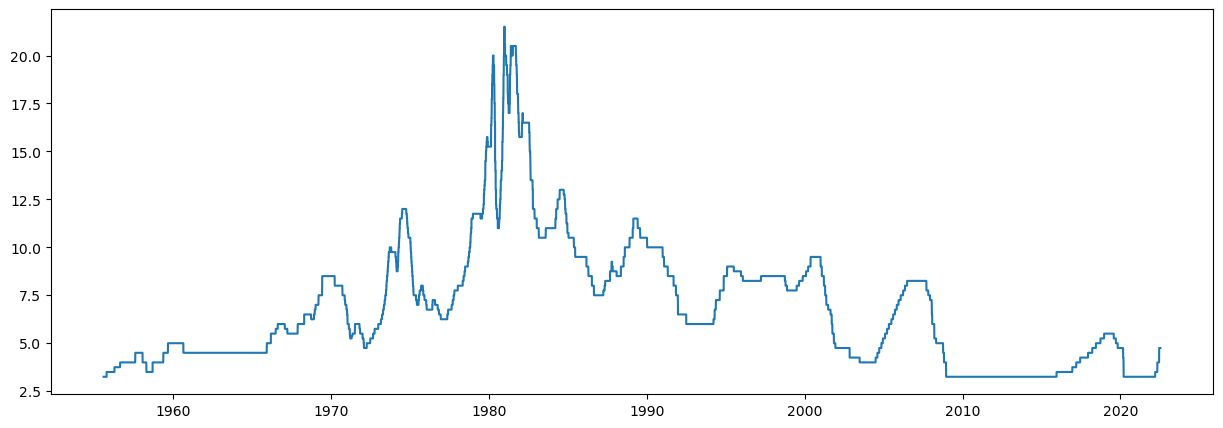

In [6]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data)

In [7]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [8]:
data_2.head()

,Date,Value
0,1955-08-04,3.25
1,1955-08-05,3.25
2,1955-08-08,3.25
3,1955-08-09,3.25
4,1955-08-10,3.25


In [9]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-06-01')]

In [10]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['Date'], axis=1, inplace=True)
data_sub.head()

,Value
datetime,
1980-01-01,15.25
1980-01-02,15.25
1980-01-03,15.25
1980-01-04,15.25
1980-01-07,15.25


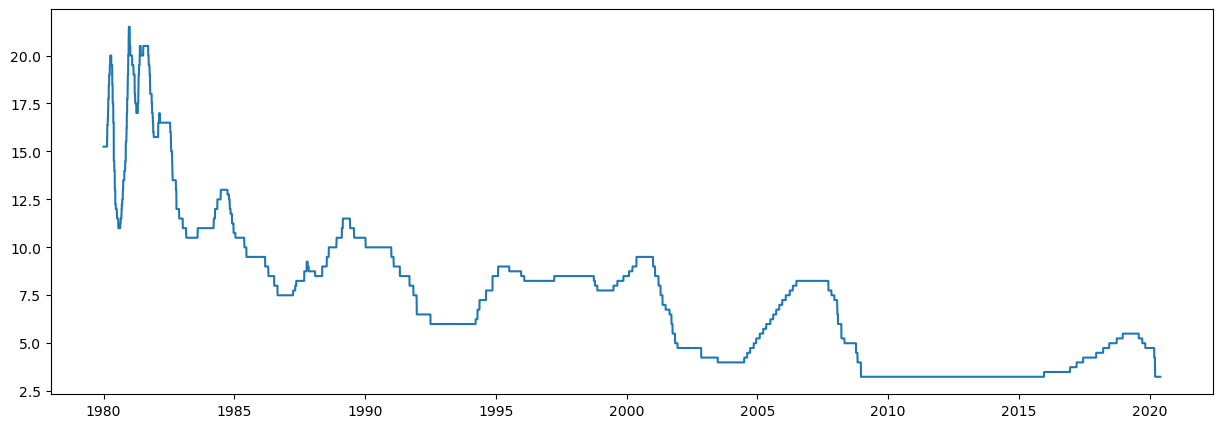

In [11]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [12]:
data_sub.isnull().sum() 

Value    0
dtype: int64

In [13]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', filt=None, period=5, two_sided=True, extrapolate_trend=0)

In [14]:
decomposition

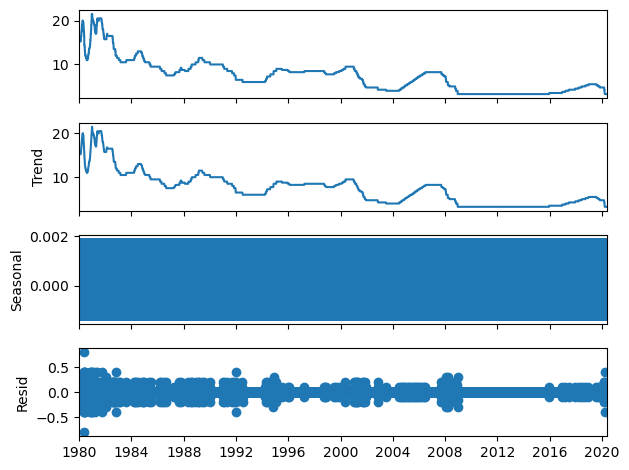

In [20]:
decomposition.plot()
plt.show()

In [21]:
# Testing for stationarity

from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                    -2.870936
p-value                            0.048834
Number of Lags Used               38.000000
Number of Observations Used    10119.000000
Critical Value (1%)               -3.430996
Critical Value (5%)               -2.861826
Critical Value (10%)              -2.566922
dtype: float64


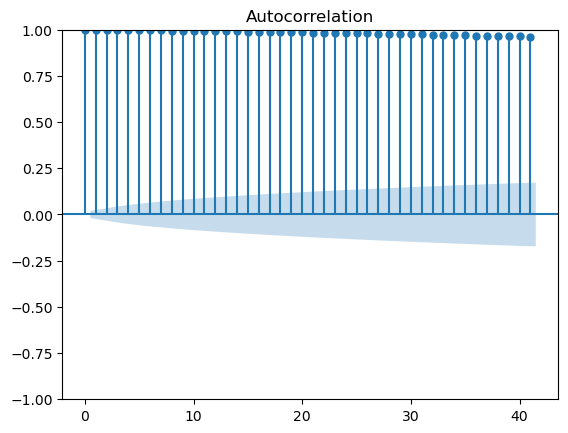

In [24]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_sub)
plt.show()

In [25]:
# Stationarizing the data

data_diff = data_sub - data_sub.shift(1)

In [26]:
data_diff.dropna(inplace = True)

In [27]:
data_diff.head()

,Value
datetime,
1980-01-02,0.0
1980-01-03,0.0
1980-01-04,0.0
1980-01-07,0.0
1980-01-08,0.0


In [28]:
data_diff.columns

Index(['Value'], dtype='object')

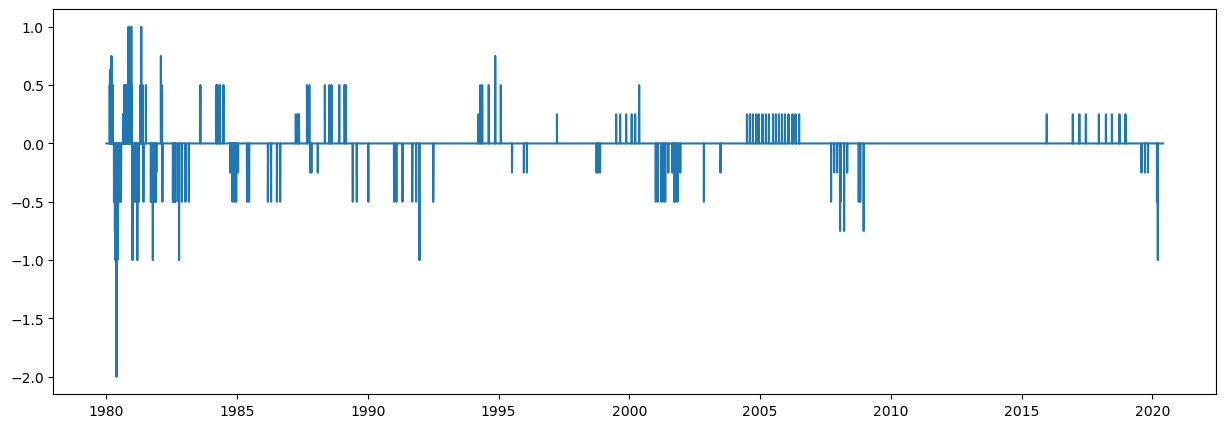

In [29]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [30]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.395540e+01
p-value                        4.621212e-26
Number of Lags Used            3.700000e+01
Number of Observations Used    1.011900e+04
Critical Value (1%)           -3.430996e+00
Critical Value (5%)           -2.861826e+00
Critical Value (10%)          -2.566922e+00
dtype: float64


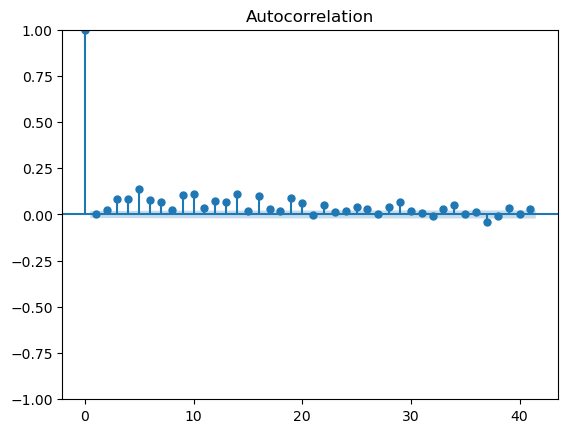

In [31]:
plot_acf(data_diff)
plt.show()